## <b>Problem Statement</b>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Step-1: Data Cleaning and Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Reading the dataset
boomBikeData = pd.read_csv('day.csv')
boomBikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Looking at the non null counts and type of variables
boomBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Looking at the data description, quantiles and min max values
boomBikeData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Casual and Registerd are types of users
# But our target is total number of users
# so we can drop the casual and registered columns
# Also the dteday variable because we have instant variable to see if the cnt increases day by day
boomBikeData = boomBikeData.drop(columns=['casual','registered','dteday'])
boomBikeData.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
#We will change the instant column to the number of days passed since the reference date
boomBikeData = boomBikeData.rename(columns={'instant':'daysPassed'})
boomBikeData.head()

,daysPassed,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
# Analysing categorical, quantitaive and ordinal variables in the dataset
boomBikeData.nunique()

daysPassed    730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [9]:
#In the data dictionary there are four values of weathersit but,
#In actual data only three unique values are there, so dropping the varaiable
#As not enough information is avaiable for it.
boomBikeData = boomBikeData.drop(columns=['weathersit'])
boomBikeData.head()

,daysPassed,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985
1,2,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,3,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600


#### <b> Categorising Data Types </b>
<b> Ordinal </b> - daysPassed, mnth, weekday <br>
<b> Categorical </b> - season, workingday, holiday, weathersit, yr <br>
<b> Continuous </b> - temp, atemp, hum, windspeed, cnt

Note: We will be treating Season as a categorical variable because we want to know in which season the sales are higher.

In [10]:
## First we will deal with the categorical variables
## Except seaons all other categorical variables are binary only
## First let's name all the 4 values 1,2,3,4 in seasons variable to create dummy out of it

def getSeasonNames(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
boomBikeData['season'] = boomBikeData['season'].apply(getSeasonNames)
boomBikeData['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

<Figure size 1152x720 with 0 Axes>

<AxesSubplot:>

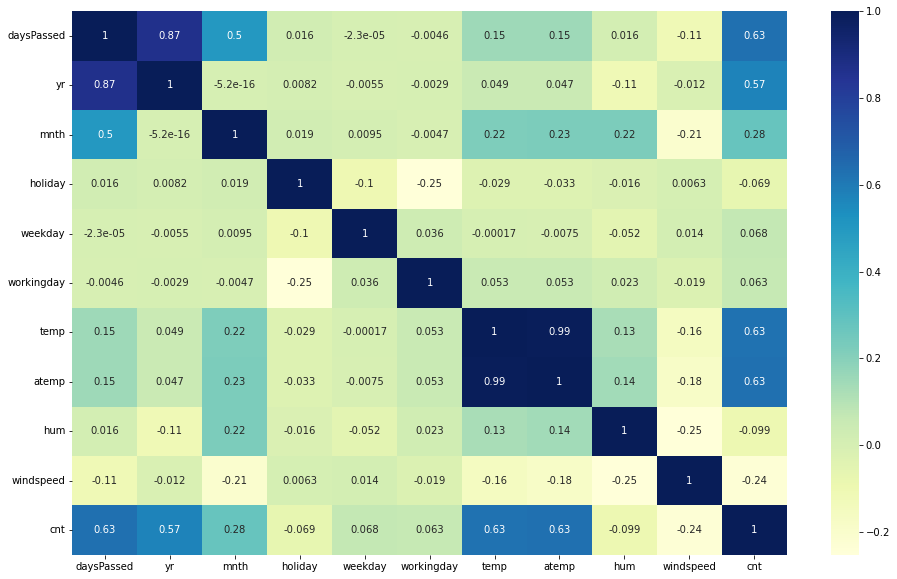

In [11]:
# Anylysing the Correlation between the variables through
# HeatMap
#heatmap
plt.figure(figsize= (16, 10))
sns.heatmap(boomBikeData.corr(), annot=True, cmap = "YlGnBu")
plt.show()

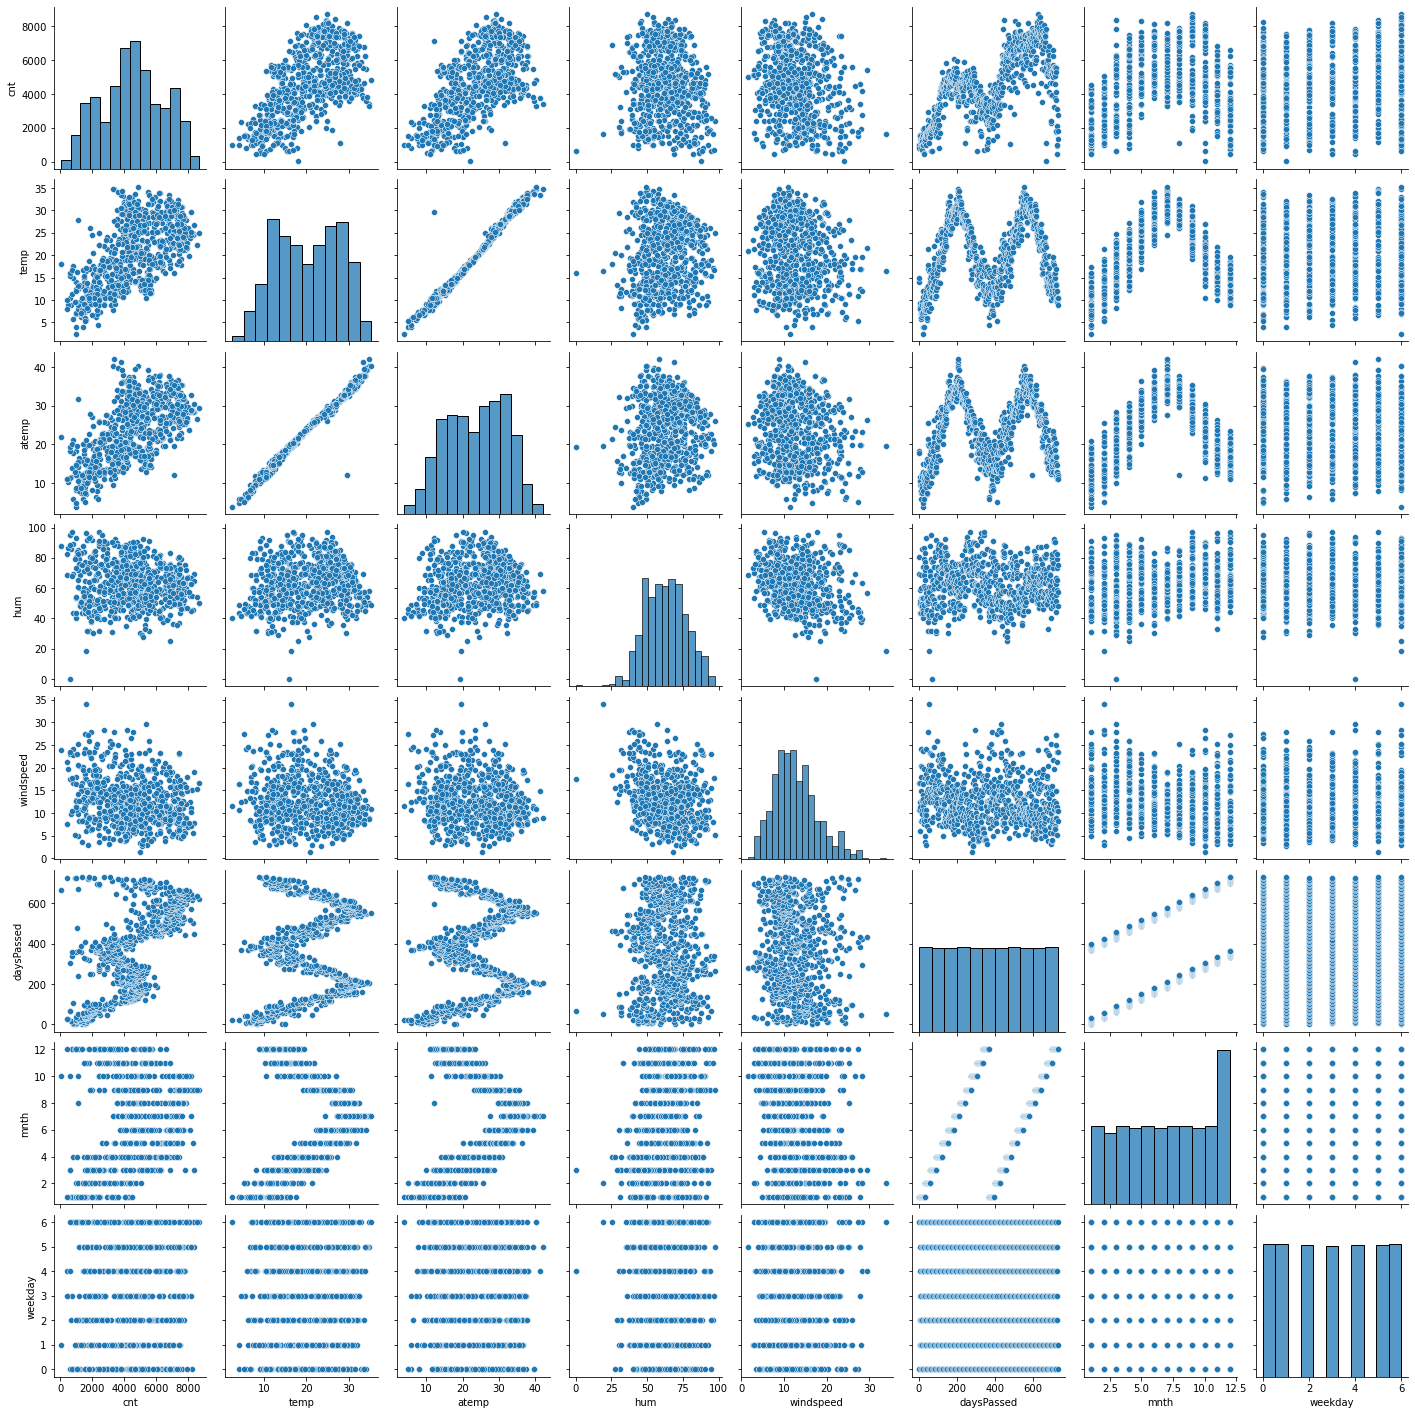

In [12]:
#Visulaising the Relation between the cnt and the numerical variables
num_vars = ['cnt','temp','atemp','hum','windspeed','daysPassed','mnth','weekday']

# Visulaising all the numerical variables
sns.pairplot(boomBikeData[num_vars])
plt.show()

#### From the above visuals
1. There is a strong positive correlation between count and temp
2. There is periodic trend but positive correlation between count and daysPassed, month and count

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='season', ylabel='cnt'>

<AxesSubplot:>

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

<AxesSubplot:>

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

<AxesSubplot:>

<AxesSubplot:xlabel='yr', ylabel='cnt'>

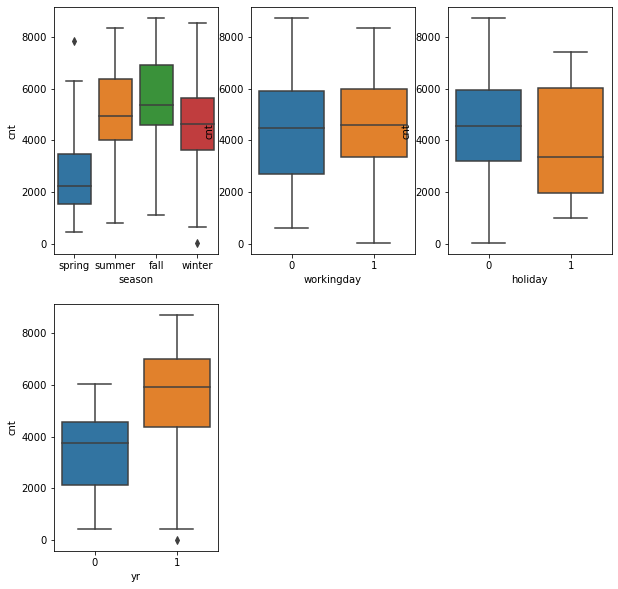

In [13]:
#Visualising the categorical variables
plt.figure(figsize=(10,10))
plt.subplot(2,3,1);
sns.boxplot(x = 'season', y = 'cnt', data = boomBikeData);
plt.subplot(2,3,2);
sns.boxplot(x = 'workingday', y = 'cnt', data = boomBikeData);
plt.subplot(2,3,3);
sns.boxplot(x = 'holiday', y = 'cnt', data = boomBikeData);
plt.subplot(2,3,4);
sns.boxplot(x = 'yr', y = 'cnt', data = boomBikeData);
plt.show()

#### From the above visuals
1. There is clear variations between seasons and count
2. In year 2019 there was comaritively higer sales than 2018

### Step-2: Preparing Data for Modelling
In this section we will do:
- Encoding of the varaibles
- Create Dummy Variables
- Scalling of the features

### Dummy Variables

In [14]:
# creating the dummy variables using get dummies method
# dropping the redundant dummy variable
seasons = pd.get_dummies(boomBikeData['season'], drop_first= True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [15]:
#Dropping the season variable
boomBikeData = boomBikeData.drop(columns='season')

In [16]:
# Concatinating the housing data with dummy data along the vertical axis
boomBikeData = pd.concat([seasons, boomBikeData], axis=1)
boomBikeData.head()

,spring,summer,winter,daysPassed,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,2,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,3,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,4,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,5,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600


### Splitting into train and test

In [17]:
# splitting between train and test
boomBikeData_train, boomBikeData_test = train_test_split(boomBikeData, train_size= 0.7, random_state= 100)
boomBikeData_train.shape
boomBikeData_test.shape

(510, 14)

(220, 14)

### Scalling the data

In [18]:
#We will use Min Max Scaler because it takes care of the outliers
# Initiate an object
scaler = MinMaxScaler()

#2. Fit on data
boomBikeData_train[num_vars] = scaler.fit_transform(boomBikeData_train[num_vars])
boomBikeData_train.head()
boomBikeData_train.describe()


,spring,summer,winter,daysPassed,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0.791209,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0.585165,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,1.000000,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0.662088,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0.152473,0,0.272727,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,0.191095


,spring,summer,winter,daysPassed,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.505055,0.507843,0.503743,0.025490,0.498366,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.287907,0.500429,0.315038,0.157763,0.336182,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.255838,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.510989,1.000000,0.545455,0.000000,0.500000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.757898,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step-3: Training the Model

In [19]:
# X_train, y_train
y_train = boomBikeData_train.pop('cnt')
X_train = boomBikeData_train

In [20]:
# add_constant
X_train_sm = sm.add_constant(X_train)

In [21]:
#build a model with all the variables
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.56e-166
Time:                        15:36:18   Log-Likelihood:                 454.56
No. Observations:                 510   AIC:                            -881.1
Df Residuals:                     496   BIC:                            -821.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3118      0.042      7.510      0.000       0.230       0.393
spring        -0.0466      0.025     -1.878      0.061      -0.095       0.002
summer         0.0593      0.017      3.513      0.000       0.026       0.092
winter         0.0881      0.020      4.373      0.000       0.049       0.128
daysPassed    -0.0294      0.365     -0.081      0.936      -0.747       0.688
yr             0.2464      0.183      1.343      0.180      -0.114       0.607
mnth           0.0438      0.170      0.258      0.796      -0.290       0.377
holiday       -0.0556      0.029     -1.894      0.059      -0.113       0.002
weekday        0.0391      0.013      2.910      0.004       0.013       0.065
workingday     0.0153      0.010      1.552      0.121      -0.004       0.035
temp           0.4067      0.150      2.706      0.007       0.111       0.702
atemp          0.1447      0.154      0.942      0.346      -0.157       0.446
hum           -0.3127      0.033     -9.487      0.000      -0.377      -0.248
windspeed     -0.2292      0.029     -7.995      0.000      -0.285      -0.173
==============================================================================
Omnibus:                       91.455   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.177
Skew:                          -0.918   Prob(JB):                     9.38e-49
Kurtosis:                       5.652   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step-4: Feature Selection
- We will follow the Bottom-up approach in dropping the varaible<br>
- We will drop the insignificant variable which are having higher p-values and VIF then will use REF to pick the most significant varaible, finally we will choose the most appropriate varaibles to train the model

In [22]:
# Now for feature selection and imporving the adjusted r squared value of the model we will use
# VIF(variance infaltion factor) to deal with multicolinearity.
# Then if still the p-values are high, we will drop columns wiht higher p-values

### Applying VIf and P-value method

In [23]:
#Creating a dataframe that will contain the feature names and there respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,features,VIF
3,daysPassed,2196.23
4,yr,834.34
5,mnth,503.88
9,temp,379.48
10,atemp,366.18
11,hum,19.23
12,windspeed,4.94
2,winter,4.54
0,spring,4.00
8,workingday,3.21


In [24]:
# from the above p-values we will first remove daysPassed variable
X_train_sm = X_train_sm.drop(columns=['daysPassed'])


In [25]:
#build a model with all the variables
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     170.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.43e-167
Time:                        15:36:18   Log-Likelihood:                 454.56
No. Observations:                 510   AIC:                            -883.1
Df Residuals:                     497   BIC:                            -828.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3112      0.041      7.630      0.000       0.231       0.391
spring        -0.0465      0.025     -1.878      0.061      -0.095       0.002
summer         0.0594      0.017      3.523      0.000       0.026       0.092
winter         0.0881      0.020      4.377      0.000       0.049       0.128
yr             0.2317      0.009     25.600      0.000       0.214       0.249
mnth           0.0303      0.028      1.088      0.277      -0.024       0.085
holiday       -0.0557      0.029     -1.897      0.058      -0.113       0.002
weekday        0.0391      0.013      2.913      0.004       0.013       0.065
workingday     0.0153      0.010      1.552      0.121      -0.004       0.035
temp           0.4062      0.150      2.707      0.007       0.111       0.701
atemp          0.1453      0.153      0.949      0.343      -0.156       0.446
hum           -0.3127      0.033     -9.500      0.000      -0.377      -0.248
windspeed     -0.2292      0.029     -8.004      0.000      -0.285      -0.173
==============================================================================
Omnibus:                       91.679   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.998
Skew:                          -0.920   Prob(JB):                     6.22e-49
Kurtosis:                       5.657   Cond. No.                         90.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Creating a dataframe that will contain the feature names and there respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,features,VIF
0,const,83.96
9,temp,57.83
10,atemp,53.34
1,spring,5.70
5,mnth,3.87
3,winter,3.80
2,summer,2.67
12,windspeed,1.19
11,hum,1.16
6,holiday,1.08


In [27]:
#Removing atemp varaible now wiht higer p and vif
X_train_sm = X_train_sm.drop(columns='atemp')

In [28]:
#build a model with all the variables
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.85e-168
Time:                        15:36:18   Log-Likelihood:                 454.10
No. Observations:                 510   AIC:                            -884.2
Df Residuals:                     498   BIC:                            -833.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3112      0.041      7.631      0.000       0.231       0.391
spring        -0.0439      0.025     -1.782      0.075      -0.092       0.005
summer         0.0622      0.017      3.752      0.000       0.030       0.095
winter         0.0913      0.020      4.603      0.000       0.052       0.130
yr             0.2315      0.009     25.590      0.000       0.214       0.249
mnth           0.0305      0.028      1.097      0.273      -0.024       0.085
holiday       -0.0568      0.029     -1.939      0.053      -0.114       0.001
weekday        0.0383      0.013      2.865      0.004       0.012       0.065
workingday     0.0152      0.010      1.544      0.123      -0.004       0.034
temp           0.5443      0.036     15.072      0.000       0.473       0.615
hum           -0.3121      0.033     -9.483      0.000      -0.377      -0.247
windspeed     -0.2349      0.028     -8.392      0.000      -0.290      -0.180
==============================================================================
Omnibus:                       88.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.388
Skew:                          -0.894   Prob(JB):                     1.25e-46
Kurtosis:                       5.598   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#Creating a dataframe that will contain the feature names and there respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,features,VIF
0,const,83.96
1,spring,5.63
5,mnth,3.87
3,winter,3.69
9,temp,3.35
2,summer,2.58
10,hum,1.16
11,windspeed,1.14
6,holiday,1.08
8,workingday,1.07


In [30]:
#Removing the mnth variable because of higher p-values
X_train_sm = X_train_sm.drop(columns='mnth')

In [31]:
#build a model with all the variables
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     203.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.78e-169
Time:                        15:36:18   Log-Likelihood:                 453.48
No. Observations:                 510   AIC:                            -885.0
Df Residuals:                     499   BIC:                            -838.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3264      0.038      8.509      0.000       0.251       0.402
spring        -0.0560      0.022     -2.544      0.011      -0.099      -0.013
summer         0.0540      0.015      3.649      0.000       0.025       0.083
winter         0.1003      0.018      5.560      0.000       0.065       0.136
yr             0.2311      0.009     25.561      0.000       0.213       0.249
holiday       -0.0556      0.029     -1.897      0.058      -0.113       0.002
weekday        0.0391      0.013      2.923      0.004       0.013       0.065
workingday     0.0149      0.010      1.518      0.130      -0.004       0.034
temp           0.5466      0.036     15.157      0.000       0.476       0.617
hum           -0.3096      0.033     -9.428      0.000      -0.374      -0.245
windspeed     -0.2347      0.028     -8.381      0.000      -0.290      -0.180
==============================================================================
Omnibus:                       88.790   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.765
Skew:                          -0.895   Prob(JB):                     3.82e-47
Kurtosis:                       5.619   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Creating a dataframe that will contain the feature names and there respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,features,VIF
0,const,74.26
1,spring,4.50
8,temp,3.34
3,winter,3.06
2,summer,2.06
9,hum,1.16
10,windspeed,1.14
5,holiday,1.08
7,workingday,1.07
4,yr,1.03


In [33]:
#Now we will drop the workingday variables which is having higer p-value
X_train_sm = X_train_sm.drop(columns = 'workingday')

In [34]:
#build a model with all the variables
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

#parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     225.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.72e-170
Time:                        15:36:18   Log-Likelihood:                 452.31
No. Observations:                 510   AIC:                            -884.6
Df Residuals:                     500   BIC:                            -842.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3367      0.038      8.907      0.000       0.262       0.411
spring        -0.0564      0.022     -2.558      0.011      -0.100      -0.013
summer         0.0541      0.015      3.651      0.000       0.025       0.083
winter         0.0994      0.018      5.503      0.000       0.064       0.135
yr             0.2315      0.009     25.575      0.000       0.214       0.249
holiday       -0.0658      0.029     -2.302      0.022      -0.122      -0.010
weekday        0.0385      0.013      2.876      0.004       0.012       0.065
temp           0.5469      0.036     15.148      0.000       0.476       0.618
hum           -0.3086      0.033     -9.386      0.000      -0.373      -0.244
windspeed     -0.2360      0.028     -8.421      0.000      -0.291      -0.181
==============================================================================
Omnibus:                       90.488   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.563
Skew:                          -0.925   Prob(JB):                     3.12e-46
Kurtosis:                       5.538   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#Creating a dataframe that will contain the feature names and there respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,features,VIF
0,const,71.93
1,spring,4.50
7,temp,3.34
3,winter,3.05
2,summer,2.06
8,hum,1.15
9,windspeed,1.14
4,yr,1.03
5,holiday,1.02
6,weekday,1.02


### Applying RFE
Now let's to see if there could be any inhancements in selecting the appropriate varaibles

In [36]:
# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [37]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)    

rfe = RFE(lm, n_features_to_select=7) 
rfe = rfe.fit(X_train, y_train)

LinearRegression()

In [38]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('spring', True, 1),
 ('summer', False, 3),
 ('winter', False, 2),
 ('daysPassed', False, 6),
 ('yr', True, 1),
 ('mnth', False, 5),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [39]:
## Let's select the top 6 varaibles given by the RFE model

In [40]:
X_train_rfe = X_train.drop(columns = ['daysPassed','summer','winter','mnth','weekday','workingday'])

In [41]:
X_train_rfe = sm.add_constant(X_train_rfe)

#build a model with all the variables
lr = sm.OLS(y_train, X_train_rfe)

#fit the model
lr_model = lr.fit()

#parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     267.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          5.91e-165
Time:                        15:36:18   Log-Likelihood:                 435.31
No. Observations:                 510   AIC:                            -854.6
Df Residuals:                     502   BIC:                            -820.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4650      0.032     14.747      0.000       0.403       0.527
spring        -0.1475      0.014    -10.789      0.000      -0.174      -0.121
yr             0.2335      0.009     25.093      0.000       0.215       0.252
holiday       -0.0668      0.029     -2.282      0.023      -0.124      -0.009
temp           0.1604      0.144      1.114      0.266      -0.122       0.443
atemp          0.2678      0.154      1.733      0.084      -0.036       0.571
hum           -0.2856      0.033     -8.548      0.000      -0.351      -0.220
windspeed     -0.2193      0.029     -7.555      0.000      -0.276      -0.162
==============================================================================
Omnibus:                       69.321   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.901
Skew:                          -0.736   Prob(JB):                     3.81e-34
Kurtosis:                       5.253   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step-5: Finalising the model
We were able to eliminate one more feature "weekday" withour much of a significant drop in r sqaured and adjusted r squared

In [42]:
X_train_hybrid = X_train.drop(columns = ['daysPassed','mnth','weekday','workingday','atemp'])

In [43]:
X_train_hybrid = sm.add_constant(X_train_hybrid)

#build a model with all the variables
lr = sm.OLS(y_train, X_train_hybrid)

#fit the model
lr_model = lr.fit()

#parameters
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     249.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.56e-169
Time:                        15:36:18   Log-Likelihood:                 448.12
No. Observations:                 510   AIC:                            -878.2
Df Residuals:                     501   BIC:                            -840.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3606      0.037      9.706      0.000       0.288       0.434
spring        -0.0571      0.022     -2.576      0.010      -0.101      -0.014
summer         0.0527      0.015      3.530      0.000       0.023       0.082
winter         0.0978      0.018      5.383      0.000       0.062       0.134
yr             0.2302      0.009     25.286      0.000       0.212       0.248
holiday       -0.0740      0.029     -2.586      0.010      -0.130      -0.018
temp           0.5459      0.036     15.011      0.000       0.474       0.617
hum           -0.3128      0.033     -9.456      0.000      -0.378      -0.248
windspeed     -0.2349      0.028     -8.322      0.000      -0.290      -0.179
==============================================================================
Omnibus:                       83.711   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.692
Skew:                          -0.841   Prob(JB):                     3.56e-45
Kurtosis:                       5.609   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step-6: Residual Analysis

In [44]:
y_train_pred = lr_model.predict(X_train_hybrid)
res = y_train - y_train_pred

<AxesSubplot:ylabel='Density'>

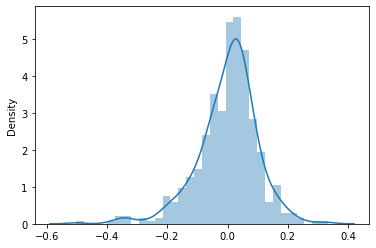

In [45]:
sns.distplot(res)

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

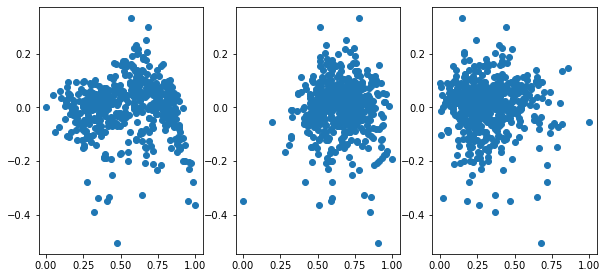

In [59]:
#Visualising residual with each numerical variable of X_train
plt.figure(figsize=(10,10))
plt.subplot(2,3,1);
plt.scatter(X_train_hybrid['temp'], res)
plt.subplot(2,3,2);
plt.scatter(X_train_hybrid['hum'], res)
plt.subplot(2,3,3);
plt.scatter(X_train_hybrid['windspeed'], res)

As we can see from the above hostogram and scatter plots:
- The residuals follow a normal pattern and Homoscedasticity.
- The error terms are independent of each other and has no pattern

### Step-7: Predictions and Evaluations on the Test Set

In [46]:
# we always fit on the train dataset {make the model learn only from training data}
# So appllying the same scaler to the test data set

#2. Fit on data
boomBikeData_test[num_vars] = scaler.transform(boomBikeData_test[num_vars])
boomBikeData_test.head() 

,spring,summer,winter,daysPassed,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0.252747,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,1,0,0.734890,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,1,0.410714,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,0.303382
221,0,0,0,0.303571,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,1,0,0.208791,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0.569029


In [47]:
boomBikeData_test.describe()

,spring,summer,winter,daysPassed,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.490559,0.481818,0.499174,0.036364,0.502273,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.294116,0.500809,0.311120,0.187620,0.330843,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.004121,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.234203,0.000000,0.272727,0.000000,0.166667,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.480082,0.000000,0.454545,0.000000,0.500000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.740041,1.000000,0.727273,0.000000,0.833333,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.001374,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [48]:
y_test = boomBikeData_test.pop('cnt')
X_test = boomBikeData_test

In [49]:
#add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,spring,summer,winter,daysPassed,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed
184,1.0,0,0,0,0.252747,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219
535,1.0,0,1,0,0.734890,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728
299,1.0,0,0,1,0.410714,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206
221,1.0,0,0,0,0.303571,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570
152,1.0,0,1,0,0.208791,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414


In [50]:
X_test_sm = X_test_sm.drop(columns = ['daysPassed','mnth','weekday','workingday','atemp'])

In [51]:
#predict
y_test_pred = lr_model.predict(X_test_sm)

### Step-8 Model Evaluation

In [52]:
r2 = r2_score(y_true=y_test, y_pred= y_test_pred)
r2.round(3)

0.799

So the r squared is exactly the same for train and test data, so here we can conclude our model